<h1>Project Title: online_banking_system</h1>
    <h2>Purpose</h2>
    <p><i>The purpose of the online banking system is to provide customers with a convenient, secure way to manage their accounts, perform transactions, and access banking services online. This system enhances customer experience by offering 24/7 accessibility and streamlined financial management.
.<i></p> 

<h2>Step 1. Downloading necessary packages </h2>

In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


<h2>Step 2. Importing necessary packages </h2>

In [1]:
# Example Python code for connecting to MySQL database using mysql-connector-python
import mysql.connector
import pandas as pd #for Data manipulation

<h2>Step 3. Establishing Connection (Database connectivity from python to mysql database) </h2>

In [2]:
#Python code for connecting to MySQL database using mysql-connector-python
import mysql.connector
import pandas as pd
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with actual credentials
connection = mysql.connector.connect(
user='root',
password='jerry',
host='localhost',
database='online_banking_system'
)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'Customers' table
cursor.execute('SELECT * FROM Customers')

#After fetching data from the database we are storing it into Pandas DataFrame
customer_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'Accounts' table
cursor.execute('SELECT * FROM Accounts')
accounts_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'Transactions' table
cursor.execute('SELECT * FROM Transactions')
transactions_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'Loans' table
cursor.execute('SELECT * FROM Loans')
loans_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'Branches' table
cursor.execute('SELECT * FROM Branches')
branches_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'Card' table
cursor.execute('SELECT * FROM Card')
card_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')

<h2>Step 4. Data View </h2>

In [3]:
# Merge customers with accounts
merged_df = pd.merge(customer_df, accounts_df, how='left', on='CustomerID')

# Merge with branches (considering BranchManagerID)
merged_df = pd.merge(merged_df, branches_df, how='left', left_on='CustomerID', right_on='BranchManagerID')

# Merge with loans
merged_df = pd.merge(merged_df, loans_df, how='left', on='CustomerID')

# Merge with transactions
merged_df = pd.merge(merged_df, transactions_df, how='left', left_on='AccountID', right_on='AccountID')

# Merge with cards
merged_df = pd.merge(merged_df, card_df, how='left', on='CustomerID')

# Display the merged DataFrame
print(merged_df)

     CustomerID FirstName  LastName                         Email PhoneNumber  \
0             1      Amit    Sharma      1amit.sharma@example.com  9876543210   
1             1      Amit    Sharma      1amit.sharma@example.com  9876543210   
2             1      Amit    Sharma      1amit.sharma@example.com  9876543210   
3             2      Neha     Verma       2neha.verma@example.com  9876543211   
4             3       Raj     Kumar        3raj.kumar@example.com  9876543212   
..          ...       ...       ...                           ...         ...   
97           96    Shweta     Patel     6shweta.patel@example.com  9876543305   
98           97      Arun     Kumar       7arun.kumar@example.com  9876543306   
99           98    Bhavna  Deshmukh  8bhavna.deshmukh@example.com  9876543307   
100          99     Nitin     Ahuja      9nitin.ahuja@example.com  9876543308   
101         100      Ritu  Malhotra   10ritu.malhotra@example.com  9876543309   

     Age  AccountID Account

In [4]:
# Print the first 5 rows of the customer_df DataFrame
print(customer_df.head())

   CustomerID FirstName LastName                     Email PhoneNumber  Age
0           1      Amit   Sharma  1amit.sharma@example.com  9876543210   48
1           2      Neha    Verma   2neha.verma@example.com  9876543211   44
2           3       Raj    Kumar    3raj.kumar@example.com  9876543212   59
3           4     Priya    Singh  4priya.singh@example.com  9876543213   47
4           5     Vijay    Patel  5vijay.patel@example.com  9876543214   43


In [5]:
print(accounts_df.head())

   AccountID  CustomerID AccountType  Balance  DateOpened    Status
0          1           1     Savings  1500.00  2020-01-01    Active
1          2           1    Checking   500.00  2020-02-01    Active
2          3           2     Savings  2500.00  2019-03-01    Active
3          4           3    Checking   300.00  2021-04-01  Inactive
4          5           4     Savings  4000.00  2018-05-01    Active


In [6]:
print(transactions_df.head())

   TransactionID  AccountID TransactionType   Amount     TransactionDate  \
0              1          1         Deposit  1000.00 2023-01-01 10:00:00   
1              2          1      Withdrawal   200.00 2023-01-02 11:00:00   
2              3          2         Deposit   500.00 2023-01-03 12:00:00   
3              4          3      Withdrawal   100.00 2023-01-04 13:00:00   
4              5          4         Deposit   300.00 2023-01-05 14:00:00   

        Description  
0   Initial Deposit  
1    ATM Withdrawal  
2  Paycheck Deposit  
3   Online Purchase  
4      Gift Deposit  


In [7]:
print(loans_df.head())

   LoanID  CustomerID       LoanType LoanAmount InterestRate LoanStartDate
0       1           1      Home Loan  250000.00         3.50    2020-06-01
1       2           2       Car Loan   15000.00         5.00    2019-07-01
2       3           3  Personal Loan    5000.00         7.50    2021-08-01
3       4           4   Student Loan   20000.00         4.00    2018-09-01
4       5           5      Home Loan  300000.00         3.60    2021-01-01


In [8]:
print(branches_df.head())

   BranchID BranchName                BranchAddress  BranchPhone  \
0         1   Downtown       123 MG Road, Bengaluru  080-1234567   
1         2     Uptown  456 Brigade Road, Bengaluru  080-2345678   
2         3   Eastside   789 Indiranagar, Bengaluru  080-3456789   
3         4   Westside   101 Koramangala, Bengaluru  080-4567890   
4         5  Northside    202 Whitefield, Bengaluru  080-5678901   

   BranchManagerID     IFSCCode  
0                1  IFSC0000001  
1                2  IFSC0000002  
2                3  IFSC0000003  
3                4  IFSC0000004  
4                5  IFSC0000005  


In [9]:
print(card_df.head())

   CardID        CardNumber CardHolderName  ExpiryDate  CVV CardType  \
0       1  1234567812345678    Amit Sharma  2025-12-31  123   Credit   
1       2  2345678923456789    Priya Singh  2024-11-30  234    Debit   
2       3  3456789034567890    Rahul Verma  2026-10-31  345   Credit   
3       4  4567890145678901   Anjali Mehta  2023-09-30  456    Debit   
4       5  5678901256789012   Vikram Patel  2025-08-31  567   Credit   

            IssuingBank  CustomerID  
0   State Bank of India           1  
1             HDFC Bank           2  
2            ICICI Bank           3  
3             Axis Bank           4  
4  Punjab National Bank           5  


In [10]:
# Prints the list of column names of the dataset
accounts_df.columns

Index(['AccountID', 'CustomerID', 'AccountType', 'Balance', 'DateOpened',
       'Status'],
      dtype='object')

In [11]:
# Prints the list of column names of the dataset
transactions_df.columns

Index(['TransactionID', 'AccountID', 'TransactionType', 'Amount',
       'TransactionDate', 'Description'],
      dtype='object')

In [12]:
# Prints the list of column names of the dataset
loans_df.columns

Index(['LoanID', 'CustomerID', 'LoanType', 'LoanAmount', 'InterestRate',
       'LoanStartDate'],
      dtype='object')

In [13]:
# Prints the list of column names of the dataset
branches_df.columns

Index(['BranchID', 'BranchName', 'BranchAddress', 'BranchPhone',
       'BranchManagerID', 'IFSCCode'],
      dtype='object')

In [14]:
# Prints the list of column names of the dataset
customer_df.columns

Index(['CustomerID', 'FirstName', 'LastName', 'Email', 'PhoneNumber', 'Age'], dtype='object')

In [15]:
# Displays the summary of the dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   100 non-null    int64 
 1   FirstName    100 non-null    object
 2   LastName     100 non-null    object
 3   Email        100 non-null    object
 4   PhoneNumber  100 non-null    object
 5   Age          100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [16]:
# Displays the summary of the dataset
accounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AccountID    100 non-null    int64 
 1   CustomerID   100 non-null    int64 
 2   AccountType  100 non-null    object
 3   Balance      100 non-null    object
 4   DateOpened   100 non-null    object
 5   Status       100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [17]:
# Displays the summary of the dataset
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LoanID         100 non-null    int64 
 1   CustomerID     100 non-null    int64 
 2   LoanType       100 non-null    object
 3   LoanAmount     100 non-null    object
 4   InterestRate   100 non-null    object
 5   LoanStartDate  100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [18]:
# Displays the summary of the dataset
branches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BranchID         100 non-null    int64 
 1   BranchName       100 non-null    object
 2   BranchAddress    100 non-null    object
 3   BranchPhone      100 non-null    object
 4   BranchManagerID  100 non-null    int64 
 5   IFSCCode         100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [19]:
# Displays the summary of the dataset
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    100 non-null    int64         
 1   AccountID        100 non-null    int64         
 2   TransactionType  100 non-null    object        
 3   Amount           100 non-null    object        
 4   TransactionDate  100 non-null    datetime64[ns]
 5   Description      100 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.8+ KB


In [20]:
# Displays the dimensions of the dataset as a tuple
customer_df.shape

(100, 6)

In [21]:
# Displays the dimensions of the dataset as a tuple
accounts_df.shape

(100, 6)

In [22]:
# Displays the dimensions of the dataset as a tuple
loans_df.shape

(100, 6)

In [23]:
# Displays the dimensions of the dataset as a tuple
transactions_df.shape

(100, 6)

In [24]:
# Displays the dimensions of the dataset as a tuple
branches_df.shape

(100, 6)

In [25]:
# Displays the data types of each column
customer_df.dtypes

CustomerID      int64
FirstName      object
LastName       object
Email          object
PhoneNumber    object
Age             int64
dtype: object

In [26]:
# Displays the data types of each column
accounts_df.dtypes

AccountID       int64
CustomerID      int64
AccountType    object
Balance        object
DateOpened     object
Status         object
dtype: object

In [27]:
# Displays the data types of each column
transactions_df.dtypes

TransactionID               int64
AccountID                   int64
TransactionType            object
Amount                     object
TransactionDate    datetime64[ns]
Description                object
dtype: object

In [28]:
# Displays the data types of each column
loans_df.dtypes

LoanID            int64
CustomerID        int64
LoanType         object
LoanAmount       object
InterestRate     object
LoanStartDate    object
dtype: object

In [29]:
# Displays the data types of each column
branches_df.dtypes

BranchID            int64
BranchName         object
BranchAddress      object
BranchPhone        object
BranchManagerID     int64
IFSCCode           object
dtype: object

In [30]:
# Generate descriptive statistics of the numerical columns in the customer_df DataFrame
customer_df.describe()

,CustomerID,Age
count,100.000000,100.000000
mean,50.500000,42.910000
std,29.011492,14.442568
min,1.000000,18.000000
25%,25.750000,30.750000
50%,50.500000,43.500000
75%,75.250000,56.250000
max,100.000000,65.000000


In [31]:
# Generating descriptive statistics of the numerical columns in a dataset
accounts_df.describe()

,AccountID,CustomerID
count,100.000000,100.000000
mean,50.500000,49.510000
std,29.011492,28.994425
min,1.000000,1.000000
25%,25.750000,24.750000
50%,50.500000,49.500000
75%,75.250000,74.250000
max,100.000000,99.000000


In [32]:
# Generating descriptive statistics of the numerical columns in a dataset
transactions_df.describe()

,TransactionID,AccountID,TransactionDate
count,100.000000,100.000000,100
mean,50.500000,49.510000,2023-02-20 06:37:12.000000256
min,1.000000,1.000000,2023-01-01 10:00:00
25%,25.750000,24.750000,2023-01-26 06:45:00
50%,50.500000,49.500000,2023-02-20 03:30:00
75%,75.250000,74.250000,2023-03-17 22:30:00
max,100.000000,99.000000,2023-04-10 10:00:00
std,29.011492,28.994425,NaN


In [33]:
# Generating descriptive statistics of the numerical columns in a dataset
loans_df.describe()

,LoanID,CustomerID
count,100.000000,100.000000
mean,50.500000,50.500000
std,29.011492,29.011492
min,1.000000,1.000000
25%,25.750000,25.750000
50%,50.500000,50.500000
75%,75.250000,75.250000
max,100.000000,100.000000


In [34]:
# Generating descriptive statistics of the numerical columns in a dataset
branches_df.describe()

,BranchID,BranchManagerID
count,100.000000,100.000000
mean,50.500000,50.500000
std,29.011492,29.011492
min,1.000000,1.000000
25%,25.750000,25.750000
50%,50.500000,50.500000
75%,75.250000,75.250000
max,100.000000,100.000000


In [35]:
# Generating descriptive statistics of the numerical columns in a dataset
card_df.describe()

,CardID,CVV,CustomerID
count,100.000000,100.000000,100.000000
mean,50.500000,493.950000,50.500000
std,29.011492,304.886711,29.011492
min,1.000000,12.000000,1.000000
25%,25.750000,234.000000,25.750000
50%,50.500000,456.000000,50.500000
75%,75.250000,789.000000,75.250000
max,100.000000,901.000000,100.000000


<h2>Step 5. Data Cleaning </h2>

In [36]:
# Print the number of null values in each column of the customer_df DataFrame
print(customer_df.isnull().sum())

# Print the number of null values in each column of the accounts_df DataFrame
print(accounts_df.isnull().sum())

# Print the number of null values in each column of the transactions_df DataFrame
print(transactions_df.isnull().sum())

# Print the number of null values in each column of the loans_df DataFrame
print(loans_df.isnull().sum())

# Print the number of null values in each column of the branches_df DataFrame
print(branches_df.isnull().sum())

# Print the number of null values in each column of the card_df DataFrame
print(card_df.isnull().sum())

CustomerID     0
FirstName      0
LastName       0
Email          0
PhoneNumber    0
Age            0
dtype: int64
AccountID      0
CustomerID     0
AccountType    0
Balance        0
DateOpened     0
Status         0
dtype: int64
TransactionID      0
AccountID          0
TransactionType    0
Amount             0
TransactionDate    0
Description        0
dtype: int64
LoanID           0
CustomerID       0
LoanType         0
LoanAmount       0
InterestRate     0
LoanStartDate    0
dtype: int64
BranchID           0
BranchName         0
BranchAddress      0
BranchPhone        0
BranchManagerID    0
IFSCCode           0
dtype: int64
CardID            0
CardNumber        0
CardHolderName    0
ExpiryDate        0
CVV               0
CardType          0
IssuingBank       0
CustomerID        0
dtype: int64


In [37]:
# Print the Balance column of the accounts_df DataFrame
print(accounts_df.Balance)

# Print the number of null values in the Balance column of the accounts_df DataFrame
print('Null values of Balance are: ', accounts_df.Balance.isnull().sum())

0     1500.00
1      500.00
2     2500.00
3      300.00
4     4000.00
       ...   
95    6300.00
96    4900.00
97    6400.00
98    5000.00
99    6500.00
Name: Balance, Length: 100, dtype: object
Null values of Balance are:  0


In [38]:
accounts_df.Balance.value_counts()

Balance
3600.00    3
3700.00    3
4500.00    3
4100.00    3
4200.00    3
          ..
500.00     1
1900.00    1
2000.00    1
2100.00    1
6500.00    1
Name: count, Length: 64, dtype: int64

In [39]:
accounts_df.Balance = pd.to_numeric(accounts_df.Balance)
accounts_df.Balance

0     1500.0
1      500.0
2     2500.0
3      300.0
4     4000.0
       ...  
95    6300.0
96    4900.0
97    6400.0
98    5000.0
99    6500.0
Name: Balance, Length: 100, dtype: float64

print(transactions_df.Amount)
print ('Null values of Amount are: ', transactions_df.Amount.isnull().sum())

In [40]:
transactions_df.Amount.value_counts()

Amount
300.00     14
100.00     11
200.00     10
500.00     10
700.00      9
150.00      9
400.00      6
1000.00     5
800.00      5
600.00      5
250.00      5
900.00      5
350.00      5
50.00       1
Name: count, dtype: int64

In [41]:
transactions_df.Amount = pd.to_numeric(transactions_df.Amount)
transactions_df.Amount

0     1000.0
1      200.0
2      500.0
3      100.0
4      300.0
       ...  
95     250.0
96     900.0
97     350.0
98     500.0
99     100.0
Name: Amount, Length: 100, dtype: float64

In [42]:
print(loans_df.LoanAmount)
print ('Null values of LoanAmount are: ', loans_df.LoanAmount.isnull().sum())

0     250000.00
1      15000.00
2       5000.00
3      20000.00
4     300000.00
        ...    
95     44000.00
96    300000.00
97     31000.00
98     29000.00
99     45000.00
Name: LoanAmount, Length: 100, dtype: object
Null values of LoanAmount are:  0


In [43]:
loans_df.LoanAmount.value_counts()

LoanAmount
22000.00     4
25000.00     4
24000.00     4
27000.00     4
23000.00     4
330000.00    4
26000.00     4
20000.00     4
29000.00     3
28000.00     3
320000.00    3
300000.00    3
21000.00     3
310000.00    3
340000.00    2
17000.00     2
15000.00     2
30000.00     2
280000.00    2
31000.00     2
19000.00     2
18000.00     2
290000.00    2
16000.00     2
38000.00     1
35000.00     1
44000.00     1
34000.00     1
43000.00     1
42000.00     1
41000.00     1
390000.00    1
33000.00     1
36000.00     1
40000.00     1
37000.00     1
39000.00     1
380000.00    1
250000.00    1
32000.00     1
360000.00    1
14000.00     1
13000.00     1
295000.00    1
12000.00     1
11000.00     1
10000.00     1
9000.00      1
8000.00      1
6000.00      1
275000.00    1
7000.00      1
5000.00      1
45000.00     1
Name: count, dtype: int64

In [44]:
loans_df.LoanAmount = pd.to_numeric(loans_df.LoanAmount)
loans_df.LoanAmount

0     250000.0
1      15000.0
2       5000.0
3      20000.0
4     300000.0
        ...   
95     44000.0
96    300000.0
97     31000.0
98     29000.0
99     45000.0
Name: LoanAmount, Length: 100, dtype: float64

In [45]:
print(loans_df.InterestRate)
print ('Null values of InterestRate are: ', loans_df.InterestRate.isnull().sum())

0     3.50
1     5.00
2     7.50
3     4.00
4     3.60
      ... 
95    4.10
96    3.50
97    5.80
98    7.00
99    4.20
Name: InterestRate, Length: 100, dtype: object
Null values of InterestRate are:  0


In [46]:
loans_df.InterestRate.value_counts()

InterestRate
3.50    8
3.60    7
4.20    6
3.40    6
6.80    5
6.90    5
4.90    4
4.00    4
6.70    4
7.00    4
4.30    4
4.10    4
4.70    3
4.80    3
6.60    2
5.60    2
5.70    2
4.50    2
4.60    2
5.80    2
4.40    2
7.10    2
3.30    2
3.70    2
7.20    2
3.90    2
5.30    1
5.00    1
5.40    1
3.80    1
5.50    1
5.10    1
7.50    1
5.90    1
5.20    1
Name: count, dtype: int64

In [47]:
# Convert the 'LoanAmount' column of the loans_df DataFrame to numeric data type
loans_df.LoanAmount = pd.to_numeric(loans_df.LoanAmount)

# Print the 'LoanAmount' column to verify the data type conversion
print(loans_df.LoanAmount)

0     250000.0
1      15000.0
2       5000.0
3      20000.0
4     300000.0
        ...   
95     44000.0
96    300000.0
97     31000.0
98     29000.0
99     45000.0
Name: LoanAmount, Length: 100, dtype: float64


In [48]:
# Get the unique values in the 'LoanType' column of the loans_df DataFrame
unique_loan_types = loans_df['LoanType'].unique()

# Print the unique loan types
print(unique_loan_types)

['Home Loan' 'Car Loan' 'Personal Loan' 'Student Loan']


<h2>Step 6. Data Visualization </h2>

In [49]:
import matplotlib.pyplot as plt

%matplotlib inline
# It enables the inline plotting mode, 
# which means that the output of plotting commands is displayed directly below the code cell that produced it.

import seaborn as sns

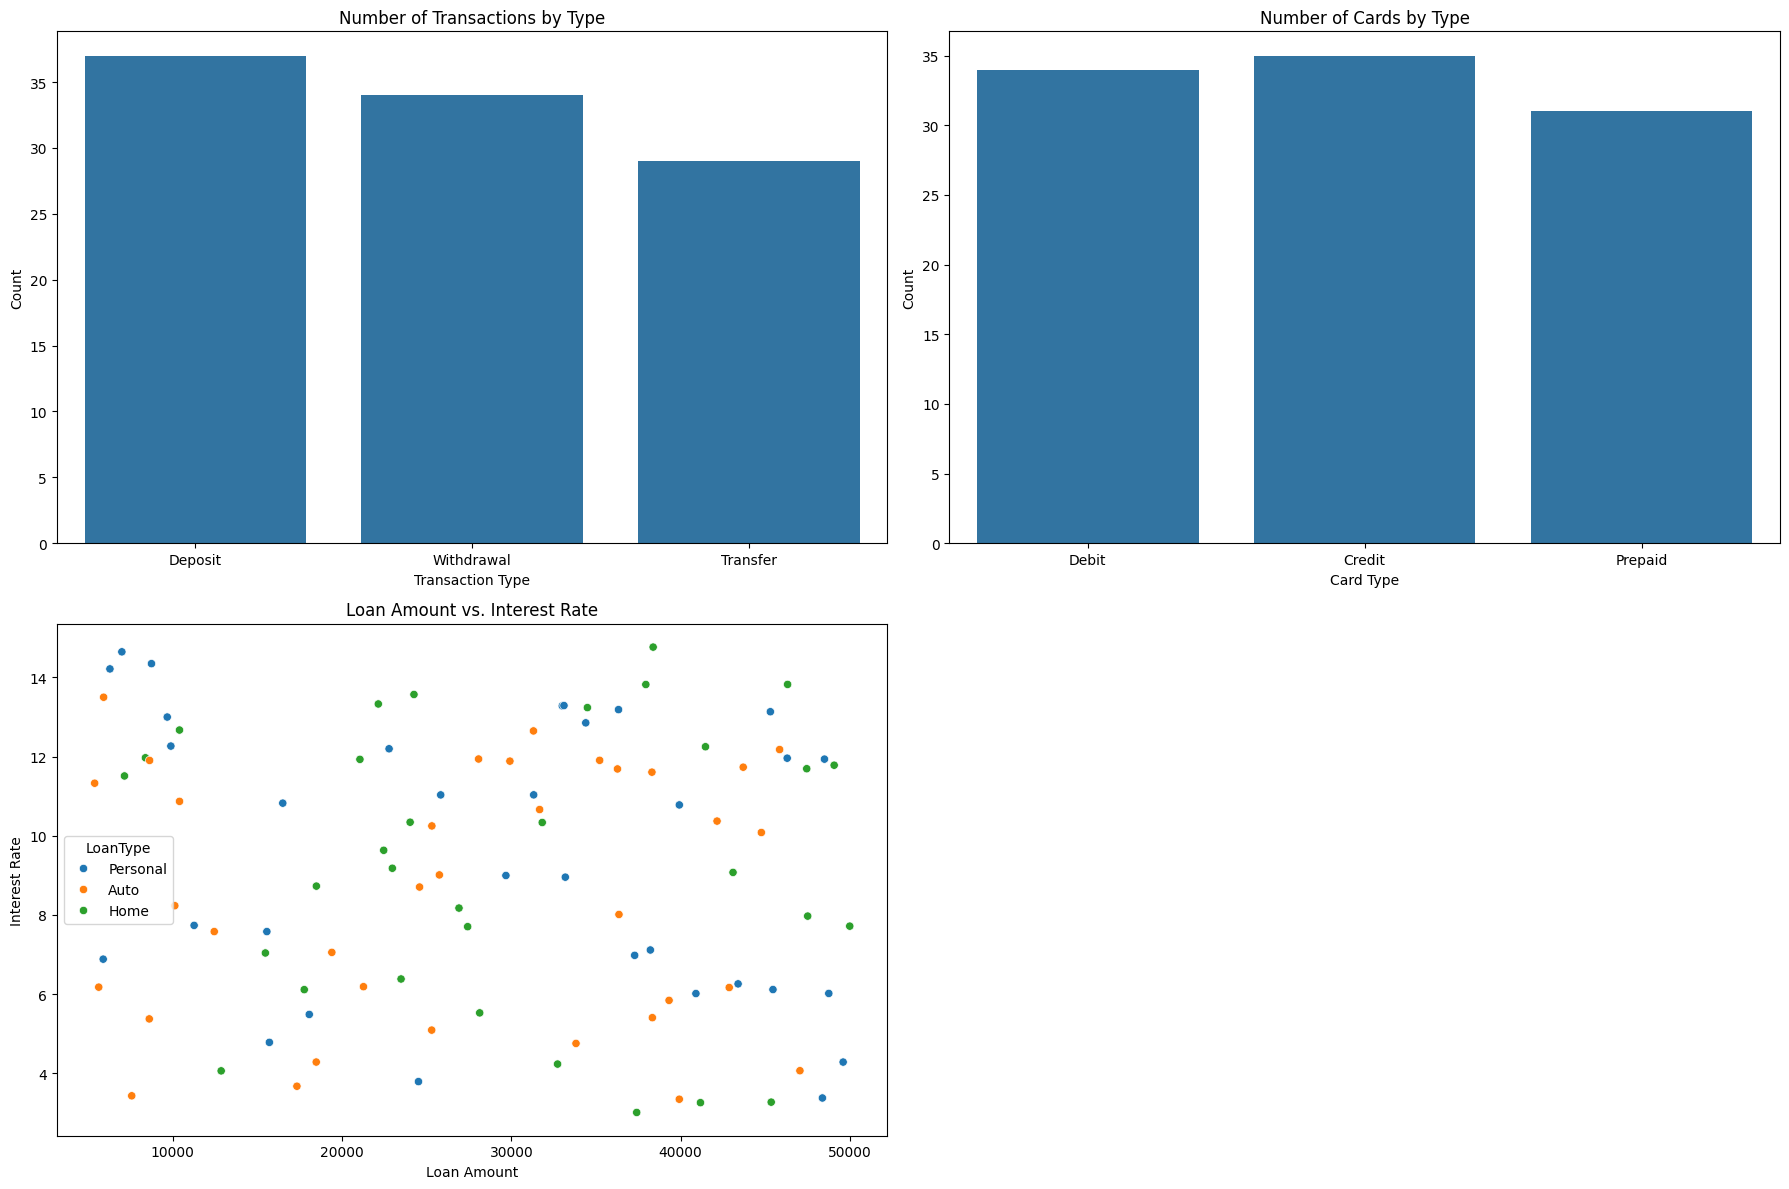

In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data for Transactions
transactions_df = pd.DataFrame({
    'TransactionID': range(1, 101),
    'AccountID': np.random.randint(1, 100, 100),
    'TransactionType': np.random.choice(['Deposit', 'Withdrawal', 'Transfer'], 100),
    'Amount': np.random.uniform(100, 1000, 100),
    'TransactionDate': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'Description': ['Description_' + str(i) for i in range(1, 101)]
})

# Sample Data for Cards
cards_data = pd.DataFrame({
    'CardID': range(1, 101),
    'CardNumber': ['Card_' + str(i) for i in range(1, 101)],
    'CardHolderName': ['Holder_' + str(i) for i in range(1, 101)],
    'ExpiryDate': pd.date_range(start='2024-01-01', periods=100, freq='M'),
    'CVV': np.random.randint(100, 999, 100),
    'CardType': np.random.choice(['Credit', 'Debit', 'Prepaid'], 100),
    'IssuingBank': np.random.choice(['Bank_A', 'Bank_B', 'Bank_C'], 100),
    'CustomerID': np.random.randint(1, 100, 100)
})

# Sample Data for Loans
loans_df = pd.DataFrame({
    'LoanID': range(1, 101),
    'CustomerID': np.random.randint(1, 100, 100),
    'LoanType': np.random.choice(['Home', 'Personal', 'Auto'], 100),
    'LoanAmount': np.random.uniform(5000, 50000, 100),
    'InterestRate': np.random.uniform(3, 15, 100),
    'LoanTerm': np.random.randint(1, 30, 100)
})

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Bar Plot for Transaction Types
sns.countplot(x='TransactionType', data=transactions_df, ax=axs[0, 0])
axs[0, 0].set_title('Number of Transactions by Type')
axs[0, 0].set_xlabel('Transaction Type')
axs[0, 0].set_ylabel('Count')

# Bar Plot for Card Types
sns.countplot(x='CardType', data=cards_data, ax=axs[0, 1])
axs[0, 1].set_title('Number of Cards by Type')
axs[0, 1].set_xlabel('Card Type')
axs[0, 1].set_ylabel('Count')

# Scatter Plot for Loan Amount vs. Interest Rate
sns.scatterplot(x='LoanAmount', y='InterestRate', data=loans_df, hue='LoanType', ax=axs[1, 0])
axs[1, 0].set_title('Loan Amount vs. Interest Rate')
axs[1, 0].set_xlabel('Loan Amount')
axs[1, 0].set_ylabel('Interest Rate')

# Hide the fourth subplot (bottom right)
axs[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

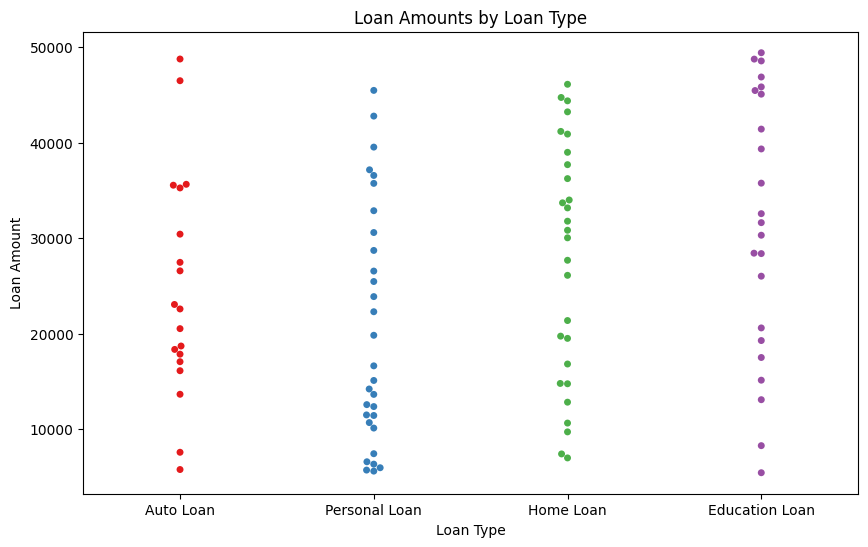

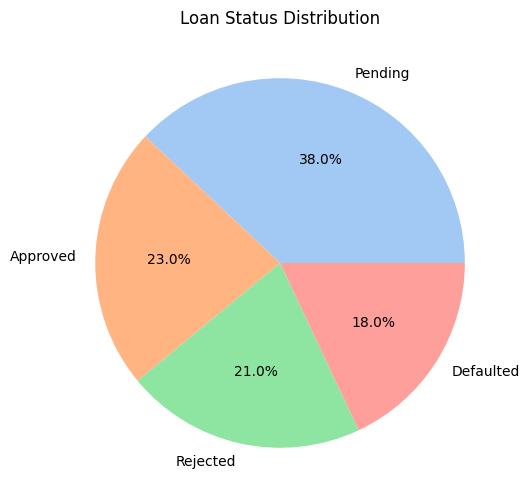

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the LoanType variable
LoanType = ['Home Loan', 'Personal Loan', 'Auto Loan', 'Education Loan']

# Sample Data for Loans (including loan status)
loan_statuses = ['Approved', 'Pending', 'Rejected', 'Defaulted']
loans_df = pd.DataFrame({
    'LoanID': range(1, 101),
    'CustomerID': np.random.randint(1, 101, 100),
    'LoanAmount': np.random.uniform(5000, 50000, 100),
    'LoanType': np.random.choice(LoanType, 100),
    'Status': np.random.choice(loan_statuses, 100)
})

# Individual Scatter Plot for Loan Amounts by Loan Type
plt.figure(figsize=(10, 6))
sns.swarmplot(x='LoanType', y='LoanAmount', data=loans_df, palette='Set1')
plt.title('Loan Amounts by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Loan Amount')
plt.show()

# Calculate the counts of each loan status
loan_status_counts = loans_df['Status'].value_counts()

# Individual Pie Chart for Loan Status Distribution
plt.figure(figsize=(10, 6))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Loan Status Distribution')
plt.show()

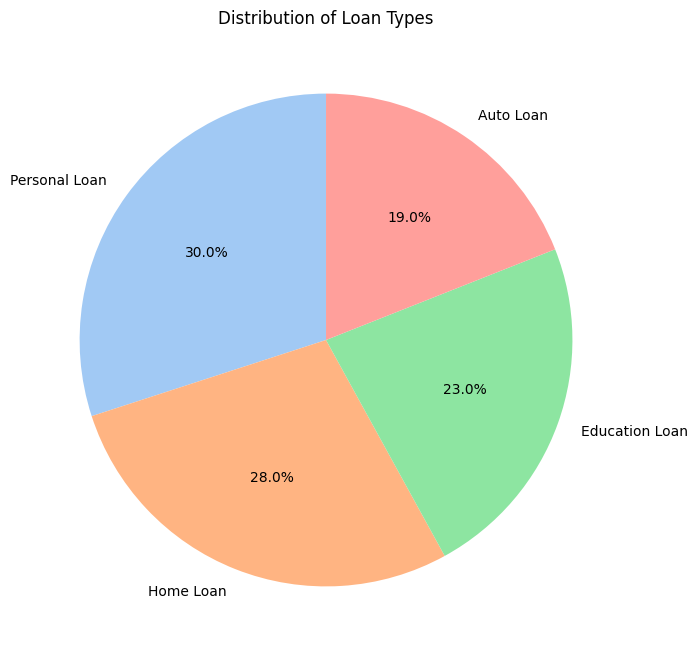

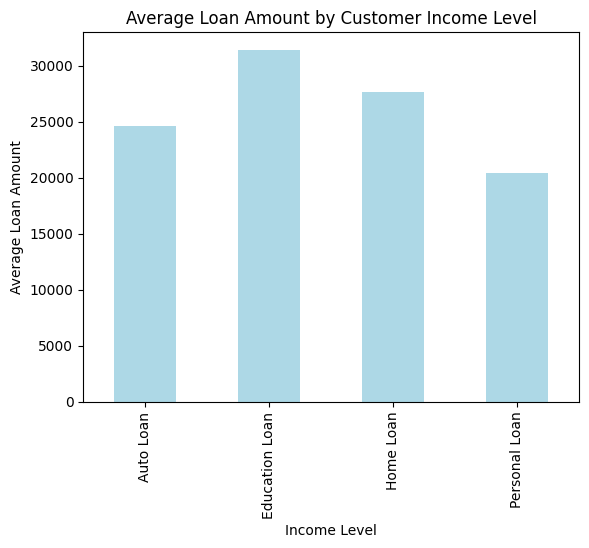

In [52]:
# Pie Chart for Loan Types
loan_type_counts = loans_df['LoanType'].value_counts()
plt.figure(figsize=(8, 8))
loan_type_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Loan Types')
plt.ylabel('')  # Hide the y-label
plt.show()

# Assuming 'customers_df' has columns 'IncomeLevel' and 'LoanAmount'
avg_loan_amount_by_income_level = loans_df.groupby('LoanType')['LoanAmount'].mean()

avg_loan_amount_by_income_level.plot(kind='bar', color='lightblue')
plt.title('Average Loan Amount by Customer Income Level')
plt.xlabel('Income Level')
plt.ylabel('Average Loan Amount')
plt.show()

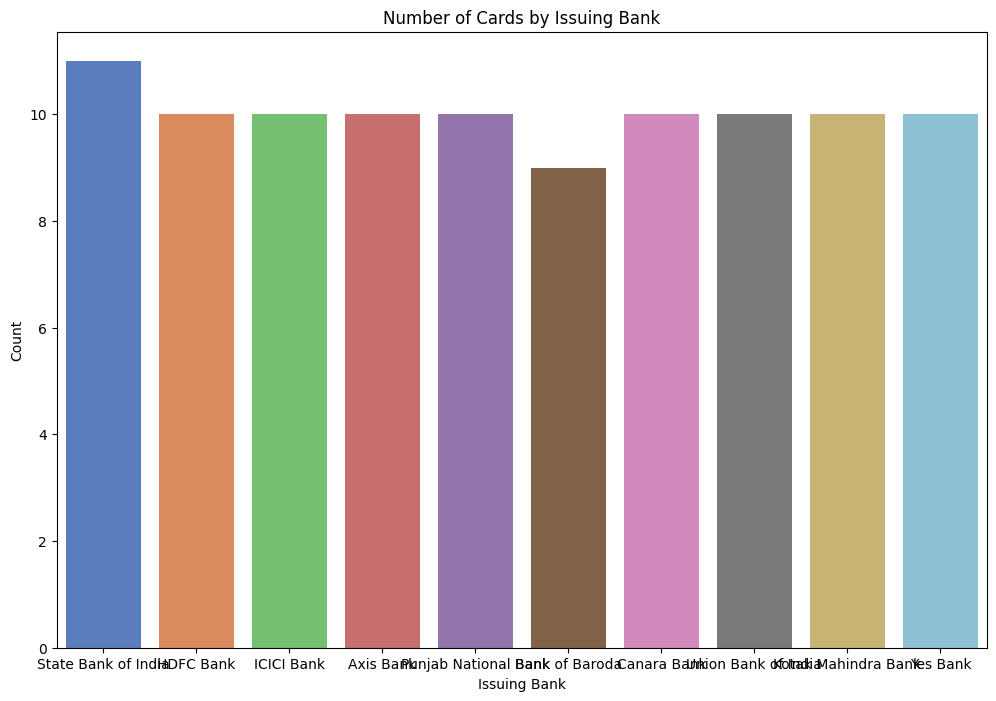

In [53]:
# Bar Plot for Issuing Bank in Cards Data
plt.figure(figsize=(12, 8))
sns.countplot(x='IssuingBank', data=card_df, palette='muted')
plt.title('Number of Cards by Issuing Bank')
plt.xlabel('Issuing Bank')
plt.ylabel('Count')
plt.show()

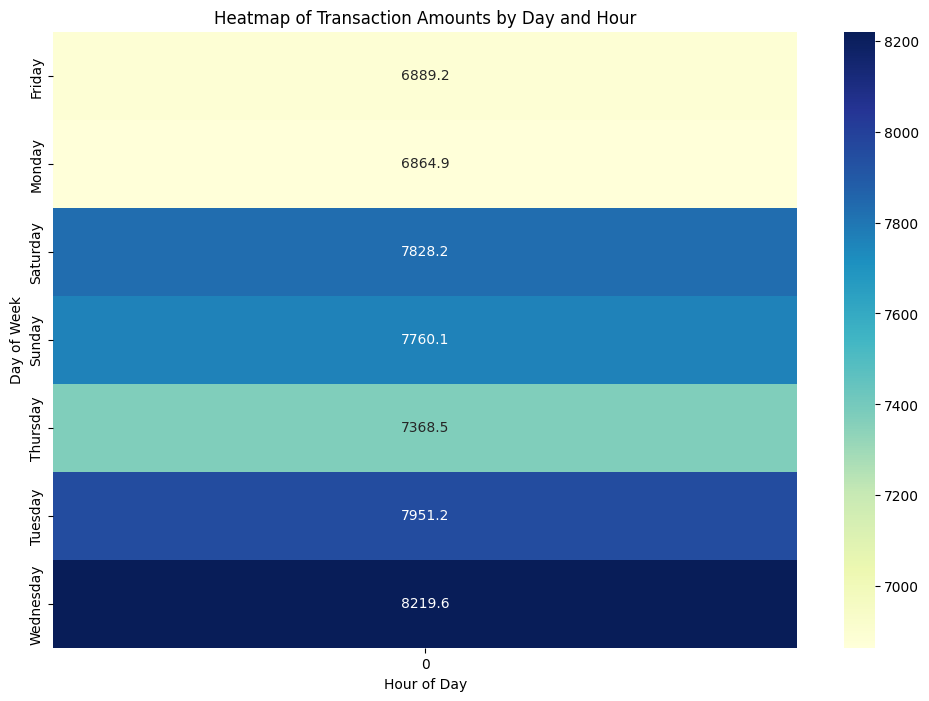

In [54]:
# Assuming 'TransactionDate' is a datetime column
transactions_df['Day'] = transactions_df['TransactionDate'].dt.day_name()
transactions_df['Hour'] = transactions_df['TransactionDate'].dt.hour

# Pivot table for heatmap
heatmap_data = transactions_df.pivot_table(index='Day', columns='Hour', values='Amount', aggfunc='sum')

# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap using the heatmap_data DataFrame, with annotations and a color map
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f')

# Set the title, x-axis label, and y-axis label for the heatmap
plt.title('Heatmap of Transaction Amounts by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

# Display the heatmap
plt.show()

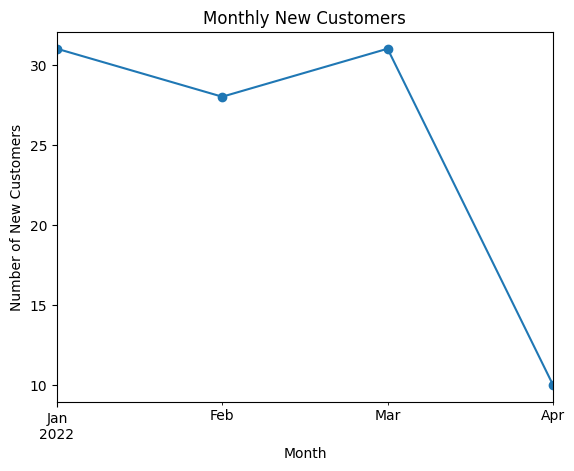

In [55]:
# Sample Data for Customers
customers_df = pd.DataFrame({
    'CustomerID': range(1, 101),
    'JoinDate': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'Name': ['Customer_' + str(i) for i in range(1, 101)]
})

# Convert JoinDate to period (monthly)
customers_df['JoinDate'] = pd.to_datetime(customers_df['JoinDate'])
customers_df['JoinMonth'] = customers_df['JoinDate'].dt.to_period('M')

# Group by JoinMonth to count the number of new customers per month
monthly_new_customers = customers_df.groupby('JoinMonth').size()

# Plot the number of new customers per month
monthly_new_customers.plot(kind='line', marker='o')
plt.title('Monthly New Customers')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.show()

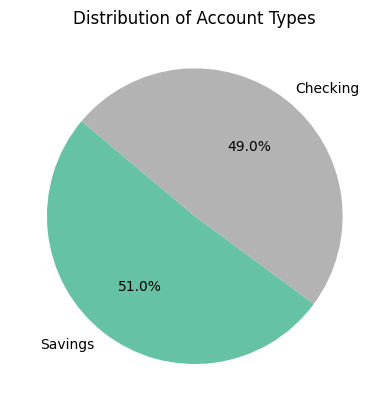

In [56]:
# Get the count of each account type in the accounts_df DataFrame
account_type_counts = accounts_df['AccountType'].value_counts()

# Create a pie chart to visualize the distribution of account types
account_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set2')

# Set the title and remove the y-axis label
plt.title('Distribution of Account Types')
plt.ylabel('')

# Display the pie chart
plt.show()

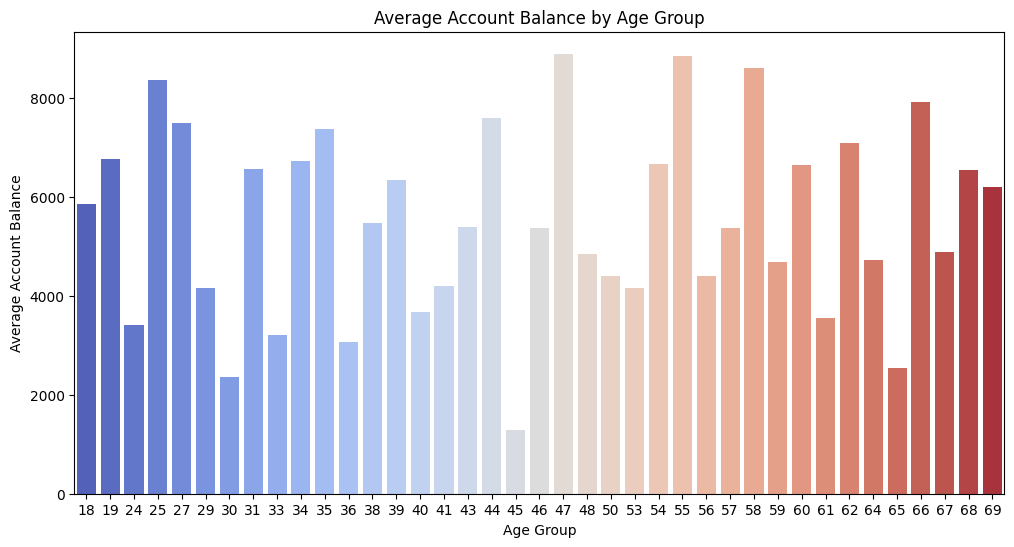

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data for Customers
customers_df = pd.DataFrame({
    'CustomerID': range(1, 101),
    'Age': np.random.randint(18, 70, 100),
    'Name': ['Customer_' + str(i) for i in range(1, 101)]
})

# Sample Data for Accounts
accounts_df = pd.DataFrame({
    'AccountID': range(1, 101),
    'CustomerID': np.random.randint(1, 101, 100),
    'Balance': np.random.uniform(1000, 10000, 100)
})

# Merge customers_df and accounts_df on CustomerID to create combined_df
combined_df = pd.merge(customers_df, accounts_df, on='CustomerID')

# Calculate the average account balance per age group
avg_balance_per_age_group = combined_df.groupby('Age')['Balance'].mean().reset_index()

# Plot the average account balance per age group
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Balance', data=avg_balance_per_age_group, palette='coolwarm')
plt.title('Average Account Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Account Balance')
plt.show()

In [58]:
#mycursor.close()
#mydb.close()

NameError: name 'mycursor' is not defined

<h2>Conclusion</h2>
An online banking system revolutionizes the way customers manage their finances by offering secure, convenient, and efficient access to a wide range of banking services. It enhances customer experience through user-friendly interfaces, real-time updates, and personalized services, while also ensuring transaction safety with robust security measures. By automating processes and reducing operational costs, it benefits both customers and banks. Additionally, the system's integration with third-party services provides a seamless and comprehensive banking experience, making financial management more accessible and effective for users worldwide.

SyntaxError: incomplete input (4205913330.py, line 17)